# Boosting in Machine Learning

## What is Boosting?
Boosting is an **ensemble learning technique** that builds a strong learner by combining the predictions of multiple **weak learners** (typically decision trees). The idea is to **improve model performance** iteratively by focusing on correcting the errors made by the previous models.

### Key Concepts:
1. Boosting trains weak learners sequentially.
2. Each weak learner is trained to **minimize the errors** of the previous model.
3. Data points that are difficult to predict are given **higher importance** in subsequent iterations.

---

## Types of Boosting
There are several types of boosting algorithms, each with its own methodology for combining weak learners. The most popular ones are:

### 1. **AdaBoost (Adaptive Boosting)**
- Adjusts the **weights** of data points based on their classification difficulty.
- Misclassified points are given **higher weights** so that subsequent models focus on them.
- Combines weak learners using a **weighted voting mechanism**.

### 2. **Gradient Boosting**
- Focuses on **optimizing a loss function** using gradients.
- Subsequent models are trained to predict the **residual errors** of the previous model.
- Highly customizable and flexible.

### 3. **XGBoost**
- An optimized implementation of Gradient Boosting.
- Features include **regularization**, **tree pruning**, and **parallel processing**, making it faster and more accurate.


### 4. **LightGBM**
- Another optimized implementation of Gradient Boosting.
- Uses **leaf-wise growth** instead of level-wise, which makes it faster and more memory-efficient for large datasets.

---

## Gradient Boosting: In Detail

### What is Gradient Boosting?
Gradient Boosting is a **specific implementation of Boosting** that uses the **gradient of the loss function** to guide the training process. It combines weak learners (e.g., decision trees) sequentially to reduce errors iteratively.


### Advantages of Gradient Boosting:
1. **Handles Non-Linear Data**:
   - Effectively captures complex patterns in the data.
2. **Customizable**:
   - Supports different loss functions (e.g., mean squared error, log-loss).
3. **Feature Importance**:
   - Provides insights into the importance of features.

---

### Parameters in Gradient Boosting:
1. **`n_estimators`**:
   - The number of weak learners (trees) to train.
   - More trees can lead to better performance but may overfit.
2. **`learning_rate`**:
   - Controls the contribution of each tree to the final prediction.
   - Smaller values (e.g., 0.01) require more trees but improve generalization.
3. **`max_depth`**:
   - The maximum depth of each tree.
   - Limits the complexity of the weak learners to prevent overfitting.

---


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import entropy

# Load the dataset
data = pd.read_csv('new_data.csv')

# Display basic info
print(data.head())
print(data.info())


   year      hwtsupp  region  statefip  metro  pernum  relate  age  sex  race  \
0  1990  1052.650024       0        36    2.0       1     101   58    1     3   
1  2009   971.200012       2         5    2.0       4    1260   28    1     0   
2  1990  1622.280029       0        36    3.0       1     101   37    1     0   
3  1990  2689.909912       3         6    3.0       1     101   34    1     0   
4  1981  1911.900024       2        51    3.0       1     101   38    1     2   

   ...  srcearn  hisp  annhrs  incwageman     hrwage   perconexp  hdwfcoh  \
0  ...      1.0     1    1820     14200.0   7.802198   64.639999        1   
1  ...      1.0     0    2080     17680.0   8.500000  100.063004        0   
2  ...      1.0     0    2080     28000.0  13.461538   64.639999        1   
3  ...      1.0     0    2115     27500.0  13.002364   64.639999        1   
4  ...      1.0     0    2080     17000.0   8.173077   43.977001        1   

   industry  occupation  education  
0        10  

# Dataset Details

- **`sex`:** Gender of the individual
  - `1` = Male
  - `2` = Female

- **`incwage`:** Wage and salary income (used as the target variable).

- **`hrwage`:** Hourly wage.

- **`incwageman`:** Manually Created INCWAGE

In [2]:
# Define features and target

# Replace 'incwage' with 'hrwage' if working with hourly wage
X = data.drop(columns=['incwageman'])  
y = data['incwageman']  # Target variable: wage and salary income

In [6]:
print(X.isnull().sum())

year          0
hwtsupp       0
region        0
statefip      0
metro         0
pernum        0
relate        0
age           0
sex           0
race          0
marst         0
nativity      0
educ99        0
classwkr      0
wkswork1      0
hrswork       0
uhrswork      0
union         0
incwage       0
inclongj      0
srcearn       0
hisp          0
annhrs        0
hrwage        0
perconexp     0
hdwfcoh       0
industry      0
occupation    0
education     0
dtype: int64


In [7]:
y

0         14200.0
1         17680.0
2         28000.0
3         27500.0
4         17000.0
           ...   
344282    17000.0
344283     3200.0
344284    13000.0
344285     8800.0
344286    15000.0
Name: incwageman, Length: 344287, dtype: float64

# Key Parameters of Gradient Boosting

## 1. **`n_estimators`**
- **Definition**:
  - This parameter specifies the **number of weak learners (trees)** to train in the ensemble.
  - Each tree is added sequentially to minimize the loss function.
- **Impact**:
  - A higher value can improve accuracy but may increase training time and lead to overfitting.
  - A lower value may lead to underfitting if the model complexity is insufficient.
- **Default Value**: 100
- **Guidelines for Tuning**:
  - Start with `n_estimators=100` and increase it gradually if the model underfits.
  - Use early stopping with cross-validation to avoid overfitting.

---

## 2. **`max_depth`**
- **Definition**:
  - This parameter determines the **maximum depth of each decision tree** in the ensemble.
  - It controls the complexity of individual trees.
- **Impact**:
  - A larger value allows the trees to capture more complex patterns but can lead to overfitting.
  - A smaller value restricts the complexity of the trees, reducing the risk of overfitting but may underfit the data.
- **Default Value**: 3
- **Guidelines for Tuning**:
  - Use `max_depth=3` as a starting point.
  - Increase it for complex datasets where deeper trees are required.
  - Decrease it for small datasets or when overfitting is observed.

---

## 3. **`random_state`**
- **Definition**:
  - This parameter is used to **control randomness** in the model training process.
  - It ensures reproducibility by fixing the random seed for processes like data splitting and model initialization.
- **Impact**:
  - Using the same `random_state` across experiments ensures that results are consistent.
- **Default Value**: `None` (random seed changes with each execution)
- **Guidelines for Tuning**:
  - Use a fixed value (e.g., `random_state=42`) during model development and experimentation to ensure reproducibility.
  - It does not affect the model's predictive power but ensures consistency in results.

---

# Summary Table

| Parameter       | Role                                                                 | Default Value | Guidelines for Tuning                                    |
|------------------|----------------------------------------------------------------------|---------------|---------------------------------------------------------|
| `n_estimators`  | Number of weak learners (trees) in the ensemble                      | 100           | Increase to improve accuracy; use early stopping to avoid overfitting. |
| `max_depth`     | Maximum depth of each decision tree                                  | 3             | Start with 

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# print("Training Gradient Boosting Regressor...")
gb_model.fit(X_train, y_train)
# print("Model Training Complete!")

# Predict on test data
y_pred = gb_model.predict(X_test)

# Add gender back to X_test for grouping predictions
X_test['gender'] = X_test['sex']  # Ensure 'sex' exists in X_test

# Separate predictions for males and females
X_test['predictions'] = y_pred
male_predictions = X_test[X_test['gender'] == 1]['predictions']
female_predictions = X_test[X_test['gender'] == 2]['predictions']

# Print aggregated results
print(f"Average Prediction for Males: {male_predictions.mean():.2f}")
print(f"Average Prediction for Females: {female_predictions.mean():.2f}")

Average Prediction for Males: 47420.44
Average Prediction for Females: 31373.04


In [9]:
X_test_alternated = X_test.copy()

X_test_alternated

,year,hwtsupp,region,statefip,metro,pernum,relate,age,sex,race,...,hisp,annhrs,hrwage,perconexp,hdwfcoh,industry,occupation,education,gender,predictions
243198,2007,1927.300049,3,6,3.0,1,101,47,2,2,...,0,2080,15.384615,94.727997,1,14,17,5,2,31519.557935
286308,2011,780.270020,1,27,1.0,1,101,28,2,0,...,0,2040,17.156862,101.653999,1,10,14,5,2,34986.393032
22328,1999,3826.449951,3,6,2.0,2,201,45,1,0,...,0,4160,12.019231,79.933998,1,12,17,3,1,50032.343901
29413,2011,771.169983,1,27,1.0,1,101,49,1,0,...,0,2600,19.230770,101.653999,1,3,19,5,1,50032.343901
168004,1990,688.840027,0,44,3.0,1,101,31,1,0,...,0,2600,16.923077,64.639999,1,10,4,2,1,44215.505524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307637,1999,365.040009,1,38,1.0,2,201,41,2,2,...,0,1600,27.500000,79.933998,1,13,8,2,2,44215.505524
272551,2011,826.880005,1,27,3.0,2,201,44,2,0,...,0,1300,11.923077,101.653999,1,7,16,5,2,15849.821193
267178,2009,1756.540039,2,48,3.0,1,101,49,2,3,...,1,1040,3.000000,100.063004,1,10,14,5,2,3247.570936
77239,1990,376.119995,0,50,1.0,1,101,59,1,0,...,0,480,29.004168,64.639999,1,4,20,5,1,14112.653984


In [10]:
X_test_alternated['sex'] = np.where(X_test_alternated['sex'] == 1, 2, 1)
X_test_alternated

,year,hwtsupp,region,statefip,metro,pernum,relate,age,sex,race,...,hisp,annhrs,hrwage,perconexp,hdwfcoh,industry,occupation,education,gender,predictions
243198,2007,1927.300049,3,6,3.0,1,101,47,1,2,...,0,2080,15.384615,94.727997,1,14,17,5,2,31519.557935
286308,2011,780.270020,1,27,1.0,1,101,28,1,0,...,0,2040,17.156862,101.653999,1,10,14,5,2,34986.393032
22328,1999,3826.449951,3,6,2.0,2,201,45,2,0,...,0,4160,12.019231,79.933998,1,12,17,3,1,50032.343901
29413,2011,771.169983,1,27,1.0,1,101,49,2,0,...,0,2600,19.230770,101.653999,1,3,19,5,1,50032.343901
168004,1990,688.840027,0,44,3.0,1,101,31,2,0,...,0,2600,16.923077,64.639999,1,10,4,2,1,44215.505524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307637,1999,365.040009,1,38,1.0,2,201,41,1,2,...,0,1600,27.500000,79.933998,1,13,8,2,2,44215.505524
272551,2011,826.880005,1,27,3.0,2,201,44,1,0,...,0,1300,11.923077,101.653999,1,7,16,5,2,15849.821193
267178,2009,1756.540039,2,48,3.0,1,101,49,1,3,...,1,1040,3.000000,100.063004,1,10,14,5,2,3247.570936
77239,1990,376.119995,0,50,1.0,1,101,59,2,0,...,0,480,29.004168,64.639999,1,4,20,5,1,14112.653984


In [11]:

feature_columns = [col for col in X_train.columns]  # Ensure only training features are included
X_test_alternated = X_test_alternated[feature_columns]

X_test_alternated

,year,hwtsupp,region,statefip,metro,pernum,relate,age,sex,race,...,inclongj,srcearn,hisp,annhrs,hrwage,perconexp,hdwfcoh,industry,occupation,education
243198,2007,1927.300049,3,6,3.0,1,101,47,1,2,...,32000.0,1.0,0,2080,15.384615,94.727997,1,14,17,5
286308,2011,780.270020,1,27,1.0,1,101,28,1,0,...,35000.0,1.0,0,2040,17.156862,101.653999,1,10,14,5
22328,1999,3826.449951,3,6,2.0,2,201,45,2,0,...,50000.0,1.0,0,4160,12.019231,79.933998,1,12,17,3
29413,2011,771.169983,1,27,1.0,1,101,49,2,0,...,50000.0,1.0,0,2600,19.230770,101.653999,1,3,19,5
168004,1990,688.840027,0,44,3.0,1,101,31,2,0,...,44000.0,1.0,0,2600,16.923077,64.639999,1,10,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307637,1999,365.040009,1,38,1.0,2,201,41,1,2,...,44000.0,1.0,0,1600,27.500000,79.933998,1,13,8,2
272551,2011,826.880005,1,27,3.0,2,201,44,1,0,...,15500.0,1.0,0,1300,11.923077,101.653999,1,7,16,5
267178,2009,1756.540039,2,48,3.0,1,101,49,1,3,...,3120.0,1.0,1,1040,3.000000,100.063004,1,10,14,5
77239,1990,376.119995,0,50,1.0,1,101,59,2,0,...,13922.0,1.0,0,480,29.004168,64.639999,1,4,20,5


In [12]:
# Predict using the alternated dataset
alternated_predictions = gb_model.predict(X_test_alternated)

In [13]:
# Add alternated predictions back to X_test for grouping
X_test['alternated_predictions'] = alternated_predictions

# Separate predictions for alternated males and females
alternated_male_predictions = X_test[X_test['sex'] == 2]['alternated_predictions']
alternated_female_predictions = X_test[X_test['sex'] == 1]['alternated_predictions']

# Calculate averages
alternated_male_avg = alternated_male_predictions.mean()
alternated_female_avg = alternated_female_predictions.mean()

# Print results
print(f"Alternated Average Prediction for Males: {alternated_male_avg:.2f}")
print(f"Alternated Average Prediction for Females: {alternated_female_avg:.2f}")

Alternated Average Prediction for Males: 31373.04
Alternated Average Prediction for Females: 47420.44


In [14]:
from scipy.stats import entropy
import numpy as np

# Function to calculate KL Divergence
def calculate_kl_divergence(original_predictions, alternated_predictions):
    epsilon = 1e-10  # Small value to avoid log(0) or division by zero
    
    # Stabilize softmax by subtracting the maximum value from predictions
    original_predictions_stable = original_predictions - np.max(original_predictions)
    alternated_predictions_stable = alternated_predictions - np.max(alternated_predictions)
    
    # Convert predictions to probabilities using stable softmax
    original_probs = np.exp(original_predictions_stable) / (np.sum(np.exp(original_predictions_stable)) + epsilon)
    alternated_probs = np.exp(alternated_predictions_stable) / (np.sum(np.exp(alternated_predictions_stable)) + epsilon)
    
    # Compute KL Divergence
    kl_divergence = entropy(original_probs, alternated_probs)
    return kl_divergence

# Calculate KL Divergence
kl_div = calculate_kl_divergence(y_pred, alternated_predictions)
print(f"KL Divergence: {kl_div:.5f}")

KL Divergence: 0.00000


In [15]:
print(f"Feature importance of 'sex': {gb_model.feature_importances_[X_train.columns.get_loc('sex')]:.5f}")

Feature importance of 'sex': 0.00000


In [61]:
feature_importance = gb_model.feature_importances_
print("Feature Importance:", dict(zip(X_train.columns, feature_importance)))

Feature Importance: {'year': 3.3103099185772797e-07, 'hwtsupp': 3.272647886703844e-05, 'region': 1.2205763818853972e-08, 'statefip': 8.525495822925723e-08, 'metro': 0.0, 'pernum': 0.0, 'relate': 0.0, 'age': 0.0, 'sex': 0.0, 'race': 3.0323378880385616e-07, 'marst': 0.0, 'classwkr': 0.0, 'wkswork1': 8.165390861120556e-08, 'hrswork': 1.8749157173127458e-08, 'uhrswork': 0.0, 'incwage': 0.9999658468403189, 'hisp': 7.893905163764646e-08, 'annhrs': 0.0, 'hrwage': 4.0408192516936715e-07, 'perconexp': 1.0164460009121556e-07, 'hdwfcoh': 0.0, 'industry': 0.0, 'occupation': 0.0, 'education': 9.88666869327195e-09}


In [64]:
correlation = X_train.corrwith(y_train)  # Correlation of each feature with target
print(correlation.sort_values(ascending=False))

incwage       1.000000
annhrs        0.336535
uhrswork      0.303378
year          0.280524
perconexp     0.280087
hrswork       0.239155
wkswork1      0.190340
age           0.122743
hdwfcoh       0.091643
metro         0.085873
hrwage        0.042001
industry      0.025416
hwtsupp       0.021327
classwkr      0.007701
region       -0.019709
statefip     -0.027490
relate       -0.066513
pernum       -0.074498
race         -0.079119
hisp         -0.084129
marst        -0.086230
sex          -0.179722
occupation   -0.259114
education    -0.270863
dtype: float64


In [66]:
corr_value = X_train['sex'].corr(y_train)
print(f"Correlation between 'sex' and 'incwageman': {corr_value:.5f}")

Correlation between 'sex' and 'incwageman': -0.17972


In [67]:
print(f"Feature importance of 'sex': {gb_model.feature_importances_[X_train.columns.get_loc('sex')]:.5f}")

Feature importance of 'sex': 0.00000


In [69]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

       Feature    Importance
15     incwage  9.999658e-01
1      hwtsupp  3.272648e-05
18      hrwage  4.040819e-07
0         year  3.310310e-07
9         race  3.032338e-07
19   perconexp  1.016446e-07
3     statefip  8.525496e-08
12    wkswork1  8.165391e-08
16        hisp  7.893905e-08
13     hrswork  1.874916e-08
2       region  1.220576e-08
23   education  9.886669e-09
8          sex  0.000000e+00
7          age  0.000000e+00
10       marst  0.000000e+00
11    classwkr  0.000000e+00
6       relate  0.000000e+00
14    uhrswork  0.000000e+00
5       pernum  0.000000e+00
17      annhrs  0.000000e+00
4        metro  0.000000e+00
20     hdwfcoh  0.000000e+00
21    industry  0.000000e+00
22  occupation  0.000000e+00


----

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Define features and target with 'sex' as the only feature
X = data[['sex']]  # Feature: Gender
y = data['incwageman']  # Target: Wage and salary income

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred = gb_model.predict(X_test)

# Separate predictions for males and females
male_predictions = y_pred[X_test['sex'] == 1]  # Predictions for males
female_predictions = y_pred[X_test['sex'] == 2]  # Predictions for females

# Calculate average predictions
male_avg = male_predictions.mean()
female_avg = female_predictions.mean()

print(f"Average Prediction for Males: {male_avg:.2f}")
print(f"Average Prediction for Females: {female_avg:.2f}")

# Alternate gender and predict
X_test_alternated = X_test.copy()
X_test_alternated['sex'] = np.where(X_test['sex'] == 1, 2, 1)  # Flip genders
alternated_predictions = gb_model.predict(X_test_alternated)

# Separate alternated predictions for males and females
alternated_male_predictions = alternated_predictions[X_test['sex'] == 1]  # Alternated males (original females)
alternated_female_predictions = alternated_predictions[X_test['sex'] == 2]  # Alternated females (original males)

# Calculate alternated average predictions
alternated_male_avg = alternated_male_predictions.mean()
alternated_female_avg = alternated_female_predictions.mean()

print(f"Alternated Average Prediction for Males: {alternated_male_avg:.2f}")
print(f"Alternated Average Prediction for Females: {alternated_female_avg:.2f}")

Average Prediction for Males: 47806.85
Average Prediction for Females: 31453.21
Alternated Average Prediction for Males: 31453.21
Alternated Average Prediction for Females: 47806.85


sex
1    47729.860941
2    31436.945960
Name: incwageman, dtype: float64


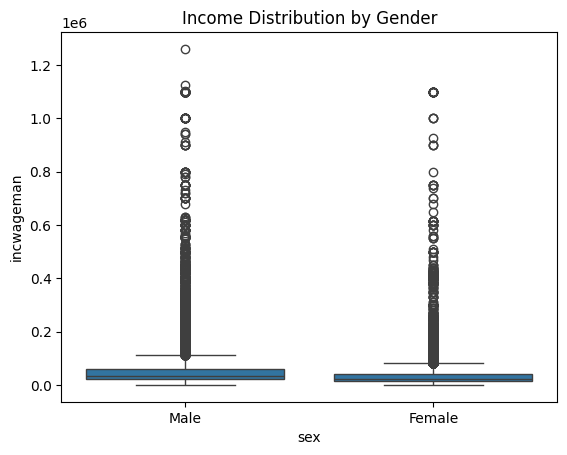

In [17]:
# Average income by gender
avg_income_by_gender = data.groupby('sex')['incwageman'].mean()
print(avg_income_by_gender)

# Income distribution by gender
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['sex'], y=data['incwageman'])
plt.title("Income Distribution by Gender")
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()